In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from taxipred.utils.constants import TAXI_CSV_PATH

df = pd.read_csv(TAXI_CSV_PATH)

In [3]:
df.shape

(1000, 11)

In [4]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [6]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [7]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


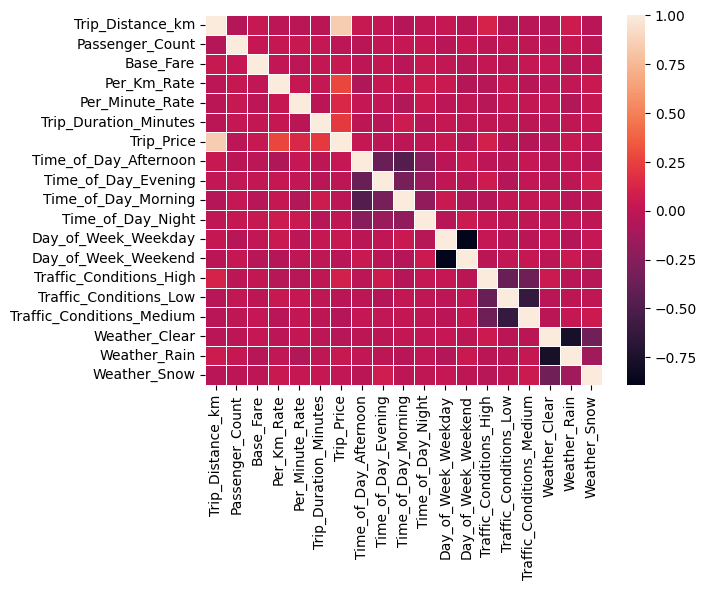

In [25]:
# do a heatmap with dummy columns
df_dummy = pd.get_dummies(df)
corr = df_dummy.corr()
sns.heatmap(corr, linewidth = .5);

In [29]:
df_dummy.corr()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
Trip_Distance_km,1.000000,-0.048397,0.032218,-0.017041,-0.025902,-0.022102,0.849123,0.033617,0.004991,-0.048249,-0.000039,0.027621,-0.023190,0.112383,-0.037708,-0.029909,-0.033528,0.060237,-0.033344
Passenger_Count,-0.048397,1.000000,0.022932,0.030213,0.034068,0.022845,-0.014223,-0.021580,0.005908,0.020634,0.026491,-0.031201,0.026079,-0.010800,0.011851,0.000482,-0.014007,0.026252,-0.013200
Base_Fare,0.032218,0.022932,1.000000,0.003092,-0.019150,0.012035,0.035533,-0.014793,0.010023,-0.031902,0.034866,0.007715,-0.033494,0.015011,-0.006973,0.020124,0.023255,-0.034710,-0.009260
Per_Km_Rate,-0.017041,0.030213,0.003092,1.000000,0.029241,0.027199,0.275135,-0.070283,0.031488,0.024914,0.054668,0.040817,-0.041884,-0.035335,0.035159,-0.034081,-0.017881,0.008957,0.046785
Per_Minute_Rate,-0.025902,0.034068,-0.019150,0.029241,1.000000,-0.024230,0.141226,0.021402,0.008543,-0.058123,0.046583,-0.016404,-0.000078,-0.036252,0.024914,0.013464,0.010035,-0.063639,0.030778
Trip_Duration_Minutes,-0.022102,0.022845,0.012035,0.027199,-0.024230,1.000000,0.221211,-0.006882,-0.033124,0.061548,-0.029630,0.029450,0.001615,0.002358,0.000181,-0.009863,-0.015502,-0.003230,0.024871
Trip_Price,0.849123,-0.014223,0.035533,0.275135,0.141226,0.221211,1.000000,0.020497,-0.005943,-0.014219,-0.004531,0.038672,-0.030137,0.095082,-0.025428,-0.044407,-0.037258,0.038793,0.005764
Time_of_Day_Afternoon,0.033617,-0.021580,-0.014793,-0.070283,0.021402,-0.006882,0.020497,1.000000,-0.387597,-0.482498,-0.245923,-0.026150,0.043372,-0.013531,-0.009676,0.018679,-0.010792,0.008811,-0.024994
Time_of_Day_Evening,0.004991,0.005908,0.010023,0.031488,0.008543,-0.033124,-0.005943,-0.387597,1.000000,-0.317068,-0.161606,0.000183,-0.026631,0.058338,-0.053815,0.008682,-0.007391,-0.006416,0.071711
Time_of_Day_Morning,-0.048249,0.020634,-0.031902,0.024914,-0.058123,0.061548,-0.014219,-0.482498,-0.317068,1.000000,-0.201174,0.040325,-0.051040,-0.048940,0.012019,0.013819,0.010547,-0.033075,-0.008188


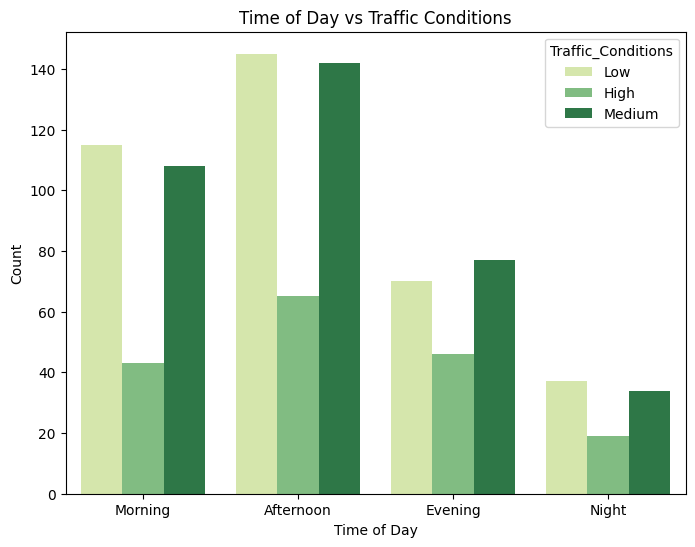

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Time_of_Day', hue='Traffic_Conditions', data=df, palette="YlGn")
plt.title('Time of Day vs Traffic Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count');

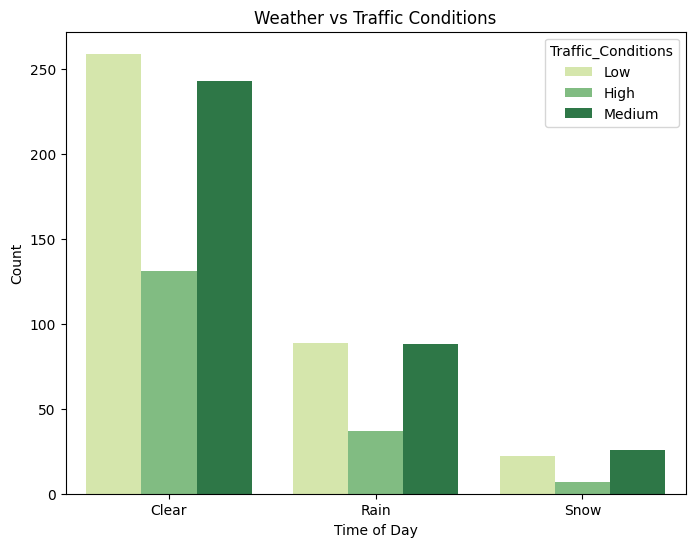

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather', hue='Traffic_Conditions', data=df, palette="YlGn")
plt.title('Weather vs Traffic Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count');

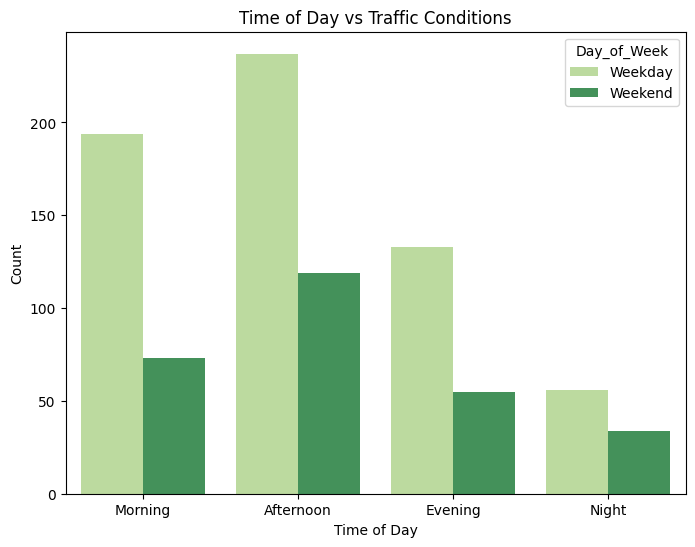

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Time_of_Day', hue='Day_of_Week', data=df, palette="YlGn")
plt.title('Time of Day vs Traffic Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count');

In [12]:
grouped = df.groupby(['Traffic_Conditions'])[['Trip_Price', 'Trip_Distance_km', 'Trip_Duration_Minutes']].mean().reset_index()
print(grouped)

  Traffic_Conditions  Trip_Price  Trip_Distance_km  Trip_Duration_Minutes
0               High   65.059510         31.792251              62.278161
1                Low   55.597238         26.145672              62.125293
2             Medium   54.547422         26.293218              61.704972


In [13]:
grouped = df.groupby(['Weather'])[['Trip_Price', 'Trip_Distance_km', 'Trip_Duration_Minutes']].mean().reset_index()
print(grouped)

  Weather  Trip_Price  Trip_Distance_km  Trip_Duration_Minutes
0   Clear   55.809128         26.592911              61.768885
1    Rain   59.769260         29.253559              61.923839
2    Snow   57.815842         24.368351              65.373889


# conclusion